# Simple Linear Regression

* We can use gradient descent to train a model to find known parameters.

In [3]:
using Plots

using Flux
using Flux: data

# "Backpropagation, or reverse-mode automatic differentiation, is handled by the Flux.Tracker module."
# https://github.com/FluxML/Flux.jl/blob/master/docs/src/internals/tracker.md

using Flux.Tracker
using Flux.Tracker: gradient, update!

┌ Info: Recompiling stale cache file /home/jw/.julia/compiled/v1.0/Flux/QdkVy.ji for Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1190


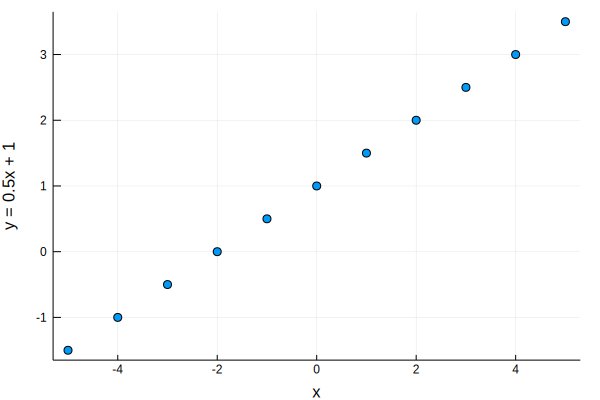

In [7]:
losses = []

xs = collect(-5.:5.)

# Create some data.  We already know the parameters we're going to 
# try to find; the slope m is 0.5 and the y-intercept is 1.
# y = mx + b
y = .5x .+ 1

scatter(xs, y, xlabel="x", ylabel="y = 0.5x + 1", leg=false)

In [2]:
# Goal, to predict sepal width from sepal length, 
# i.e. a simple linear regression.

# Want slope 'w' and y-intercept 'b', such that:
# sepal_width ≈ w*sepal_length + b


# Start with some deliberately bad guesses for W and b:
# does not converge, not sure why.
# W = param(Float64[-2.])
# b = param(Float64[14.])


# THIS FUCKING WORKS; IT GETS THE Y-INTERCEPT CORRECT!
# m = param(Float64[.5])
# b = param(Float64[-3])


# THIS FUCKING WORKS; IT GETS THE SLOPE CORRECT, WHEN LR IS 0.001
# m = param(Float64[.4])
# b = param(Float64[1])

# "We can tell Flux to treat something as a parameter via param."
m = param(Float64[.4])
b = param(Float64[2])


Tracked 1-element Array{Float64,1}:
 2.0

In [ ]:
y

In [6]:
# Define a model.
model(x, m, b) = m .* x .+ b


model (generic function with 1 method)

In [ ]:

model(x)

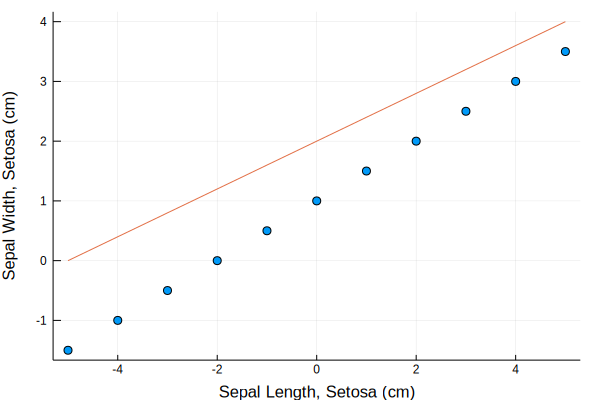

In [4]:
scatter(x, y, xlabel="Sepal Length, Setosa (cm)", ylabel="Sepal Width, Setosa (cm)", leg=false)
plot!(x, data(model(x)), leg=false)

In [ ]:
#loss(x, y) = Flux.mse(model(x), y)

In [6]:
function loss(x_, y_)
  ŷ = model(x_)
  sum((y_ .- ŷ).^2)
end


loss (generic function with 1 method)

# Start the training loop


In [ ]:
push!(losses, data(loss(sepal_length, sepal_width)))

In [ ]:
# for current values of W and b, find the gradients with respect to the loss function.

grads = gradient(
    () -> loss(sepal_length, sepal_width), # anonymous function that takes no arguments.
    Params([W, b])
)

In [ ]:
@show grads[W]
@show grads[b]

In [ ]:
update!(W, -0.0001.*grads[W])

In [ ]:
update!(b, -0.0001.*grads[b])

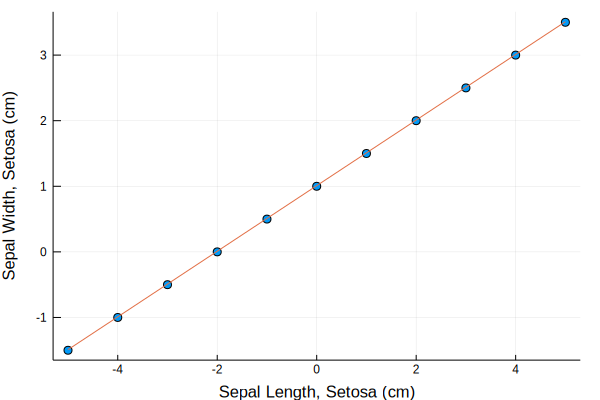

In [17]:
for i in 1:100
    push!(losses, data(loss(x, y)))

    grads = gradient(
        () -> loss(x, y), # anonymous function that takes no arguments.
        Params([m, b])
    )

    # This LR works if you are just tuning the y-intercept.
#    update!(m, -0.001.*grads[m])
#    update!(b, -0.001.*grads[b])

    # THIS LR WORKS FOR JUST TUNING THE SLOPE.
    update!(m, -0.001.*grads[m])
    update!(b, -0.001.*grads[b])
end

scatter(x, y, xlabel="Sepal Length, Setosa (cm)", ylabel="Sepal Width, Setosa (cm)", leg=false)
plot!(x, data(model(x)), leg=false)

In [ ]:
plot(losses)

In [ ]:
losses

In [ ]:
b

In [ ]:
3*1.3 - 1.75

In [ ]:
W.data

In [ ]:
sepal_length[1:5]

In [ ]:
W.data .* sepal_length[1:5]

In [ ]:
W.data .* sepal_length

In [ ]:
data(model(sepal_length))


In [ ]:
@show W.data
@show grads[W]



@show Δ
@show Δ.data
@show -0.001.*grads[W]

In [ ]:
W.data .+= data(-0.001.*grads[W])

In [ ]:
W

In [ ]:
using Flux.Tracker: tracker

tracker(W).grad .= 0

In [ ]:
grads[W]

In [ ]:
# Update the parameter and reset the gradient
@which update!(W, -0.001.*grads[W])
#update!(b, -0.001.*grads[b])




In [ ]:
loss(sepal_length, sepal_width)

In [ ]:
# ok, the model is w and b.

# want to adjust those.

# need a loss function, to then calculate the mse
model(W, b, x) = W * x + b

Tracker.gradient(f, 2, 3, 4)

loss(x, y) = Flux.mse(model(x), y)